* Prepare rules for the all the data sets 
* 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence  values
* 2) Change the minimum length in apriori algorithm
* 3) Visulize the obtained rules using different plots

* Loaded the books dataset
* There are 2000 observations and 11 features
* Florence is the name of location in italy
* So, divided the original dataset into 2 datasets namely
        book_ds_florence  -- 217 rows
        book_ds           -- 1783 rows
* Calculated the best frequent items & association rules for both the datasets


* book_ds_florence  -- 217 rows

    Support = 0.3, Confidence = 0.1 -- 4 sets of products which r bought together
    Support = 0.2, Confidence = 0.7 -- 18 sets of products which r bought together

* book_ds           -- 1783 rows

    Support = 0.2, Confidence = 0.2 -- 2 sets of products which r bought together
    Support = 0.1, Confidence = 0.7 -- 17 sets of products which r bought together


* Inferences
* As support(min_support) decreases -- no. of frequent item sets increases
* As confidenc(min_threshold) decreases -- no. of associations increases

## Import Libraries

In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

In [24]:
book_data = pd.read_csv('book.csv')
book_data.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


## Initial Analysis

In [80]:
print(book_data.shape)
print(book_data.isnull().sum())
print(book_data.dtypes)

(2000, 11)
ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64
ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object


<AxesSubplot:xlabel='Florence', ylabel='count'>

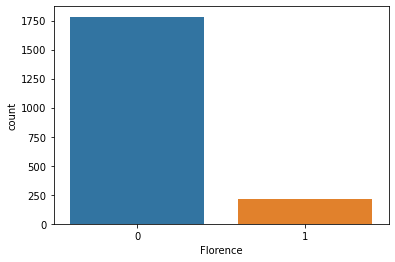

In [25]:
sns.countplot(book_data['Florence'])

In [26]:
book_data['Florence'].value_counts()

0    1783
1     217
Name: Florence, dtype: int64

In [28]:
book_data.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


# Building Association Rules - When Area is Florence

In [29]:
book_ds_florence = book_data[(book_data['Florence']) == 1]
book_ds_florence

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
5,1,0,0,0,0,1,0,0,0,0,1
12,1,0,0,0,0,1,0,0,0,0,1
19,1,1,1,0,0,1,0,0,0,0,1
27,0,0,0,0,0,0,0,0,0,0,1
61,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1954,0,0,0,0,0,0,0,0,0,0,1
1960,1,0,1,1,1,0,0,1,1,0,1
1969,1,0,0,0,0,0,0,0,0,0,1
1975,1,0,0,0,0,0,0,0,0,0,1


In [30]:
book_ds_florence.shape

(217, 11)

In [31]:
book_ds_florence = book_ds_florence.iloc[:,:-1]
book_ds_florence

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
5,1,0,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0
19,1,1,1,0,0,1,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0
61,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1954,0,0,0,0,0,0,0,0,0,0
1960,1,0,1,1,1,0,0,1,1,0
1969,1,0,0,0,0,0,0,0,0,0
1975,1,0,0,0,0,0,0,0,0,0


## Support = 0.3, Confidence = 0.1
* As support(min_support) decreases -- no. of frequent item sets increases
* As confidenc(min_threshold) decreases -- no. of associations increases

In [32]:
# to generate best frequent item sets
frequent_ds_fl = apriori( df = book_ds_florence, min_support=0.3, use_colnames=True)
print(frequent_ds_fl.shape)
frequent_ds_fl

(6, 2)


,support,itemsets
0,0.447005,(ChildBks)
1,0.437788,(CookBks)
2,0.447005,(ArtBks)
3,0.391705,(GeogBks)
4,0.308756,"(ChildBks, CookBks)"
5,0.308756,"(ChildBks, ArtBks)"


In [33]:
# to generate best associations
rules = association_rules(df= frequent_ds_fl, metric='confidence', min_threshold=0.6)
rules.sort_values(by = 'support', axis=0, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.447005,0.437788,0.308756,0.690722,1.577754,0.113062,1.817819
1,(CookBks),(ChildBks),0.437788,0.447005,0.308756,0.705263,1.577754,0.113062,1.876234
2,(ChildBks),(ArtBks),0.447005,0.447005,0.308756,0.690722,1.545223,0.108943,1.788018
3,(ArtBks),(ChildBks),0.447005,0.447005,0.308756,0.690722,1.545223,0.108943,1.788018


Text(0, 0.5, 'Confidence')

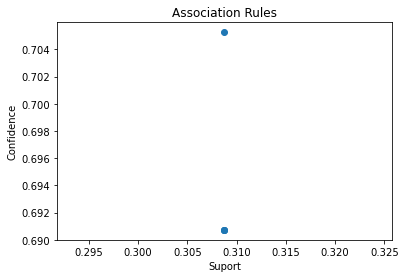

In [34]:
plt.title("Association Rules")
plt.scatter(x=rules['support'], y=rules['confidence'])
plt.xlabel("Suport")
plt.ylabel("Confidence")

## Support = 0.2, Confidence = 0.7

In [35]:
# to generate best frequent item sets
frequent_ds_fl = apriori( df = book_ds_florence, min_support=0.2, use_colnames=True)
print(frequent_ds_fl.shape)
frequent_ds_fl

(20, 2)


,support,itemsets
0,0.447005,(ChildBks)
1,0.235023,(YouthBks)
2,0.437788,(CookBks)
3,0.290323,(DoItYBks)
4,0.285714,(RefBks)
5,0.447005,(ArtBks)
6,0.391705,(GeogBks)
7,0.308756,"(ChildBks, CookBks)"
8,0.207373,"(ChildBks, DoItYBks)"
9,0.308756,"(ChildBks, ArtBks)"


In [36]:
# to generate best associations
rules1 = association_rules(df= frequent_ds_fl, metric='confidence', min_threshold=0.7)
print(rules1.shape)
rules1.sort_values(by = 'support', axis=0, ascending=False)

(18, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.437788,0.447005,0.308756,0.705263,1.577754,0.113062,1.876234
4,(GeogBks),(CookBks),0.391705,0.437788,0.285714,0.729412,1.666130,0.114230,2.077740
2,(GeogBks),(ChildBks),0.391705,0.447005,0.281106,0.717647,1.605458,0.106012,1.958525
6,(GeogBks),(ArtBks),0.391705,0.447005,0.276498,0.705882,1.579139,0.101404,1.880184
8,"(ChildBks, ArtBks)",(CookBks),0.308756,0.437788,0.230415,0.746269,1.704635,0.095245,2.215777
7,"(ChildBks, CookBks)",(ArtBks),0.308756,0.447005,0.230415,0.746269,1.669488,0.092399,2.179452
9,"(CookBks, ArtBks)",(ChildBks),0.290323,0.447005,0.230415,0.793651,1.775487,0.100639,2.679901
5,(DoItYBks),(ArtBks),0.290323,0.447005,0.225806,0.777778,1.739977,0.096031,2.488479
10,"(ChildBks, GeogBks)",(CookBks),0.281106,0.437788,0.225806,0.803279,1.834858,0.102742,2.857911
11,"(CookBks, GeogBks)",(ChildBks),0.285714,0.447005,0.225806,0.790323,1.768041,0.098091,2.637363


Text(0, 0.5, 'Confidence')

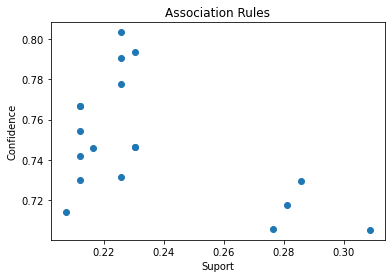

In [37]:
plt.title("Association Rules")
plt.scatter(x=rules1['support'], y=rules1['confidence'])
plt.xlabel("Suport")
plt.ylabel("Confidence")

# Building Association Rules - for other Area(Not Florence)

In [38]:
book_ds = book_data[(book_data['Florence']) == 0]
book_ds

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [39]:
book_ds.shape

(1783, 11)

In [41]:
book_ds = book_ds.iloc[:,:-1]
book_ds

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
0,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0
4,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0


## Support = 0.2, Confidence = 0.4

In [63]:
# to generate best frequent item sets
frequent_ds = apriori( df = book_ds, min_support=0.2, use_colnames=True)
print(frequent_ds.shape)
frequent_ds

(8, 2)


,support,itemsets
0,0.420079,(ChildBks)
1,0.249019,(YouthBks)
2,0.430174,(CookBks)
3,0.280987,(DoItYBks)
4,0.205833,(RefBks)
5,0.215928,(ArtBks)
6,0.261918,(GeogBks)
7,0.249579,"(ChildBks, CookBks)"


In [71]:
rules_others = association_rules(df = frequent_ds, metric='confidence',min_threshold=0.4)
rules_others.sort_values(by = 'support', axis=0, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.420079,0.430174,0.249579,0.594126,1.381129,0.068873,1.403947
1,(CookBks),(ChildBks),0.430174,0.420079,0.249579,0.580183,1.381129,0.068873,1.381366


Text(0, 0.5, 'Confidence')

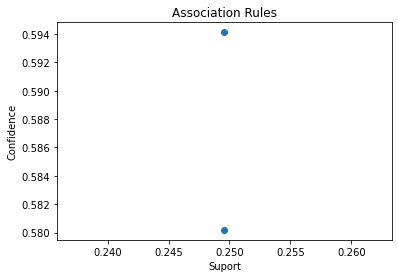

In [73]:
plt.title("Association Rules")
plt.scatter(x=rules_others['support'], y=rules_others['confidence'])
plt.xlabel("Suport")
plt.ylabel("Confidence")

## Support = 0.1, Confidence = 0.7

In [74]:
# to generate best frequent item sets
frequent_ds_2 = apriori( df = book_ds, min_support=0.1, use_colnames=True)
print(frequent_ds_2.shape)
frequent_ds_2

(34, 2)


,support,itemsets
0,0.420079,(ChildBks)
1,0.249019,(YouthBks)
2,0.430174,(CookBks)
3,0.280987,(DoItYBks)
4,0.205833,(RefBks)
5,0.215928,(ArtBks)
6,0.261918,(GeogBks)
7,0.107684,(ItalCook)
8,0.166012,"(ChildBks, YouthBks)"
9,0.249579,"(ChildBks, CookBks)"


In [78]:
rules_others_2 = association_rules(df = frequent_ds_2, metric='confidence',min_threshold=0.7)
print(rules_others_2.shape)
rules_others_2.sort_values(by = 'support', axis=0, ascending=False)

(17, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(GeogBks),(ChildBks),0.261918,0.420079,0.184520,0.704497,1.677060,0.074494,1.962488
3,(ArtBks),(CookBks),0.215928,0.430174,0.151991,0.703896,1.636306,0.059104,1.924413
2,(RefBks),(CookBks),0.205833,0.430174,0.148065,0.719346,1.672222,0.059521,2.030351
0,(RefBks),(ChildBks),0.205833,0.420079,0.145822,0.708447,1.686463,0.059356,1.989076
7,"(ChildBks, DoItYBks)",(CookBks),0.181155,0.430174,0.144139,0.795666,1.849637,0.066211,2.788695
8,"(DoItYBks, CookBks)",(ChildBks),0.183960,0.420079,0.144139,0.783537,1.865215,0.066862,2.679074
13,"(ChildBks, GeogBks)",(CookBks),0.184520,0.430174,0.140213,0.759878,1.766445,0.060837,2.373073
14,"(CookBks, GeogBks)",(ChildBks),0.181155,0.420079,0.140213,0.773994,1.842498,0.064114,2.565954
6,"(YouthBks, CookBks)",(ChildBks),0.159282,0.420079,0.127874,0.802817,1.911112,0.060963,2.941030
5,"(ChildBks, YouthBks)",(CookBks),0.166012,0.430174,0.127874,0.770270,1.790602,0.056460,2.480420


Text(0, 0.5, 'Confidence')

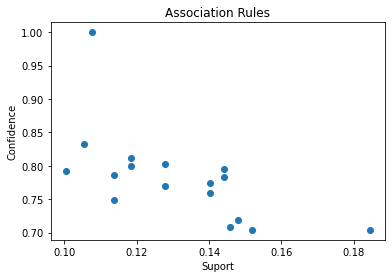

In [79]:
plt.title("Association Rules")
plt.scatter(x=rules_others_2['support'], y=rules_others_2['confidence'])
plt.xlabel("Suport")
plt.ylabel("Confidence")